
# Project: Investigate a Dataset - tmdb_movies.csv

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [125]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function.
## removed ` =0.25.0` to get the latest version of pandas
##  because `df.head()` throws an error otherwise 
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# pd.options.display.max_rows = 9999
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv', sep=',')
# print(df.head)
df.head()
# type(df)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning

 

In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

# Structure

### Overall
* 10866 observations
* 21 variables:
    * 11 are object
    * 6 are int
    * 4 are float
* Two unique IDs for each observation:
    * `id`
    * `imdb_id`
    * any one will suffice in this analysis
* `budget` and `revenue`:
    * `budget` and `revenue` are in units of money in the year of production
    * `budget_adj` and `revenue_adj` are, simply, real (inflation-adjusted) `budget` and `revenue` respectively
* `release_date` is in `string` format

### Missing and null values
* Observations have missing values
* Case(s) in point
    * 7930 missing values in the `homepage` variable
    * 76 missing values in the `cast` variable
    
### Multiple values for a variable
* Variables `cast`, `genre` and `production_companies` use the pipe symbol, `|`, as a seperator

### Duplicate observations
* 1 duplicate observation
    * will investigate and drop if appropriate 

In [35]:
'''
Function to show the properties of a dataset

Takes in one arg: df, a pandas DF

prints out the info, shape and #duplicates of df
if df is a pandas DF, else, an `operation failed`
message

return: None
'''

def show_props(df):
    """function show_props"""
#     df = df if df and type(df) == pandas.core.frame.DataFrame else None
    
    if df is not None:   
        print(f'Info for dataset:\n{df.info()}')
        print(f'Shape of dataset:\n{df.shape}')
        print(f'Duplicates for dataset:\n{df.duplicated().value_counts()}')
#         print(f'Operation failed. Please ensure that your pass a pandas dataFrame to the function')
    else:
        print(f'Operation failed. Please ensure that your pass a pandas dataFrame to the function')
#         print(f'Info for {df}:\n{df.info}')
#         print(f'Shape of {df}:\n{df.shape}')
#         print(f'Duplicates for {df}:\n{df.duplicated().value_counts()}')

# Cleaning

* Drop `homepage` and `imdb_id`
    * `homepage` contains URLs; these will not be used in this analysis
    * `imdb_id` and `id` serve the same purpose in this analysis. `id` suffices
            
* See if the the number of missing values of the remaining variables is significant enough to drop
    * find the number of missing values per variable
    * find the proportion of said missing values per variable  to the total
    * if proportion exceeds a threshold, fill missing with median, else, drop observation

* Make data types of variables consistent
    * change the following to `int`:
         * `revenue_adj`
         * `budget_adj`
         * `popularity`
         * `vote_average`

* Convert `release_date` to `datetime` object using the `datetime` module

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['homepage', 'imdb_id'], axis=1, inplace=True)

In [9]:
#list of columns
variables = list(df.columns)

In [10]:
#list containing the number of missing values per variable
num_missing = list(df.isnull().sum())

In [11]:
#use a dict comp to see `variables` and `num_missing` together
missing_values = {k:v for (k,v) in zip(variables, num_missing)}

In [12]:
#list containing proportion of missing values to total on a per variable basis
# 4 dp, percent
missing_proportion = [f'{i/10866:0.4f}%' for i in num_missing]

In [13]:
#see the proportions per variable
missing_val_proportions = {k:v for (k,v) in zip(variables, missing_proportion)}


## Majority of variables have few missing values

### To fill
* All variables:
    * with missing values
    * whose proportion of missing values is 0.0000%
    * whose values are not categorical

### To drop
* `cast`. I can easily find these online, however, that is outside the scope of this project
* `director`. I can easily find these online, however, that is outside the scope of this project
* `tagline`. The proportion is too high to fill meaningfully because `tagline` is a [qualitative variable](https://www.statisticshowto.com/qualitative-variable/)
* `keywords`. I can easily find these online, however, that is outside the scope of this project
* `overview`. I can easily find these online, however, that is outside the scope of this project
* `genres`. I can easily find these online, however, that is outside the scope of this project
* `production_companies`. I can easily find these online, however, that is outside the scope of this project


In [14]:
#drop values from variables discussed above
to_drop_list = [i for i in variables if missing_val_proportions[i] != '0.0000%']
df.dropna(axis='index', subset=to_drop_list, inplace=True)
df.info() #7032 obs, 19 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 10865
Data columns (total 19 columns):
id                      7032 non-null int64
popularity              7032 non-null float64
budget                  7032 non-null int64
revenue                 7032 non-null int64
original_title          7032 non-null object
cast                    7032 non-null object
director                7032 non-null object
tagline                 7032 non-null object
keywords                7032 non-null object
overview                7032 non-null object
runtime                 7032 non-null int64
genres                  7032 non-null object
production_companies    7032 non-null object
release_date            7032 non-null object
vote_count              7032 non-null int64
vote_average            7032 non-null float64
release_year            7032 non-null int64
budget_adj              7032 non-null float64
revenue_adj             7032 non-null float64
dtypes: float64(4), int64(6), object(9)

In [15]:
#drop duplicate value
df.drop_duplicates(inplace=True)

In [25]:
'''
Function to drop observations in data set

Takes in 1 arg: the data set

Data set must be a pandas dataframe

Drops missing, NA and duplicate values

returns a clean dataset if successful, else, none
'''

def drop_rows(df):
    """function drop_rows"""
#     df = df if df and type(df) == pandas.core.frame.DataFrame else None
    variables = list(df.columns)
    if df:
        try:
            try:
                df.drop(['homepage', 'imdb_id'], axis=1, inplace=True)
            except:
                print(f'Failed to drop rows associated with selected columns')
            try:
                num_missing = list(df.isnull().sum())
                missing_values = {k:v for (k,v) in zip(variables, num_missing)}           
                missing_proportion = [f'{i/10866:0.4f}%' for i in num_missing]
                missing_val_proportions = {k:v for (k,v) in zip(variables, missing_proportion)}
                to_drop_list = [i for i in variables if missing_val_proportions[i] != '0.0000%']
                df.dropna(axis='index', subset=to_drop_list, inplace=True)
                df.info()
            except:
                print(f'Failed to drop null values')
            try:
                df.drop_duplicates(inplace=True)
            except:
                print(f'Failed to drop duplicate values')
        except:
            print(f'Drop operation failed')

In [17]:
# Convert `release_date` type from str to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [34]:
#See if changes have taken place
show_props(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 10865
Data columns (total 19 columns):
id                      7031 non-null int64
popularity              7031 non-null float64
budget                  7031 non-null int64
revenue                 7031 non-null int64
original_title          7031 non-null object
cast                    7031 non-null object
director                7031 non-null object
tagline                 7031 non-null object
keywords                7031 non-null object
overview                7031 non-null object
runtime                 7031 non-null int64
genres                  7031 non-null object
production_companies    7031 non-null object
release_date            7031 non-null datetime64[ns]
vote_count              7031 non-null int64
vote_average            7031 non-null float64
release_year            7031 non-null int64
budget_adj              7031 non-null float64
revenue_adj             7031 non-null float64
dtypes: datetime64[ns](1), floa

<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1

* How does the average rating of behave over the years?
    * Does it change at all?
    * If yes, what is the direction of change?

* Two variables:
    * `release_year`, which is the independent variable
    * `rating`, the dependent variable
* Will use `groupby` on `release_year` then find the mean of `vote_average` for each year

In [22]:
'''
Function to calculate mean of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: average  of grouped data
'''

def group_avg(var_1, var_2):
    """ function group_avg"""
#     var_1 = var_1 if var_1 and type(var_1) == pandas.core.series.Series else None
#     var_2 = var_2 if var_2 and type(var_2) == pandas.core.series.Series else None
    if var_1 and var_2:
        avg_gp_data = df.groupby(var_1)[var_2].mean()
        return avg_gp_data
    else:
        print(f'Check that both arguments are columns of s pandas DF and try again')

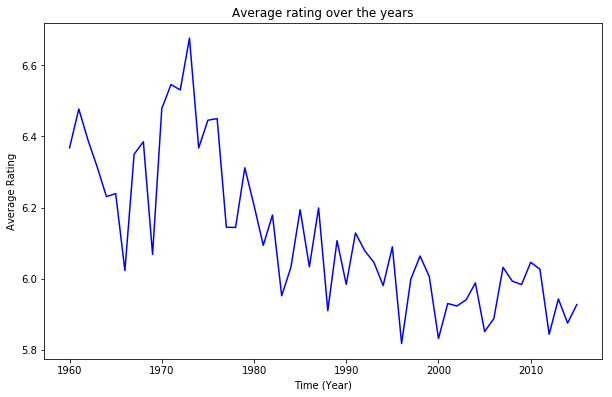

In [24]:
# call the groupby_avg function on `release_year` and `vote_average`
avg_rating_time = group_avg("release_year","vote_average")

# plot `vote_average` vs `release_year`
avg_rating_time.plot(kind='line',color='blue',title='Average rating over the years',figsize = (10,6.18))
# x-axis name
plt.xlabel('Time (Year)')
# y-axis name
plt.ylabel('Average rating');

#### Findings
* Average rating changes with time
    * the rating fluctuates
        * rating appears to rise at the beginning of every decade then falls towards the end
* Said rating decreases with time
    * the trend shows that rating decreases with time despite the fluctuations

### Research Question 2 
* How does average revenue behave over the years?
    * Does it change at all?
    * If yes, what is the direction of change?

* Two variables:
    * `release_year`, the independent variable
    * `revenue`, the dependent variable
* Will use groupby on `release_year` then find the mean of `revenue` for each year

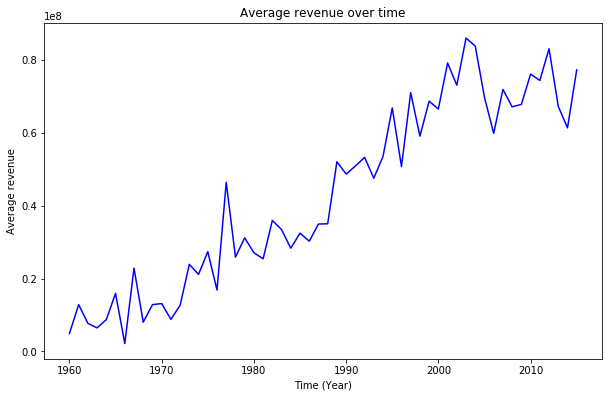

In [37]:
#call the group_avg function on `release_year` and `revenue`
avg_rev_time = group_avg("release_year","revenue")

# plot `revenue` vs `release_year`
avg_rev_time.plot(kind='line',color='blue',title='Average revenue over time',figsize = (10,6.18))
# x-axis name
plt.xlabel('Time (Year)')
# y-axis name
plt.ylabel('Average revenue');

#### Findings
* Average revenue changes with time
    * the revenue fluctuates
        * revenue appears to rise at the beginning of every decade then falls towards the end
* Said revenue increases with time
    * the trend shows that revenue increases with time despite the fluctuations

### Research Question 3
* How long, on average, is a movie?

* QED: Find the mean of `df['runtime']`
    * might want to see the quartiles and standard dev

In [38]:
df["runtime"].describe()

count    7031.000000
mean      104.839994
std        23.804709
min         0.000000
25%        92.000000
50%       101.000000
75%       114.000000
max       705.000000
Name: runtime, dtype: float64

#### Findings
* the average runtime is _c._ 105 minutes
* the longest movie lasts 705 minutes (_c._ 11h 45 min)
* data for the shortest movie is affected by zero values; no movie is zero minutes long
* the CV is _c._ 0.22 (i.e 23.804709/104.839994). This suggests that majority of the `runtime` observations are very close to the mean
* mean is greater than median (50%); this suggests a skew to the right

* histogram of the above supports the findings...

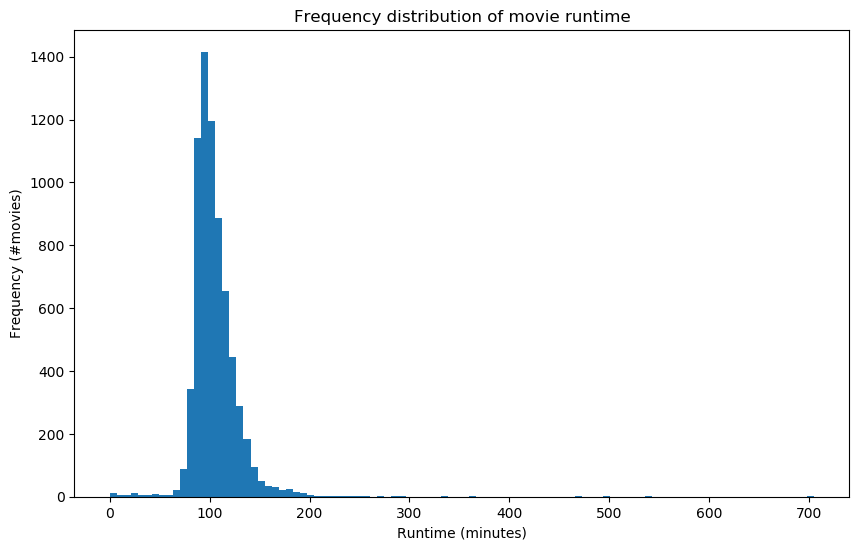

In [42]:
# fig size
plt.figure(figsize=(10,6.18), dpi = 100)

# x-axis name
plt.xlabel('Runtime (minutes)')
# y-axis name 
plt.ylabel('Frequency (#movies)')
# hist title
plt.title('Frequency distribution of movie runtime')

# plot `number of movies` vs `runtime`
plt.hist(df['runtime'], bins =100);

###  Research Question 4
* What genre accounts for what proportion of the total number of movies released?

* variable `genres` has multiple values delimited by the pipe operator, `|`
* two options to extract values:
    * use the module `re`
    * use `str`, `split` and `cat` on `pd.Series`
* will use the latter because of project requirements
    * create a function that
        * splits each occurrence of a value based on the delimiter
        * counts said occurrence
        * returns the `value_counts` of each
* use `matplotlib` to visualise the `value_counts`

In [67]:
'''
Function that separates multiple values in a variable
then calculates the number of movies in each genre

Takes in one arg: var_col

The arg must be a pandas DF column

return: value_counts of each value if var_col, else, None
'''

def split_count(var_col):
    """ function split_count """
#     var_col = var_col if var_col and type(var_col) == pandas.core.series.Series else None
    if not var_col:
        print(f'Please ensure that you pass in a pandas DF column to the function')
    else:
        split_vals = pd.Series(df[var_col].str.cat(sep = '|').split('|'))
        count_vals = split_vals.value_counts(ascending=False)
        return count_vals


* create the visualisation...

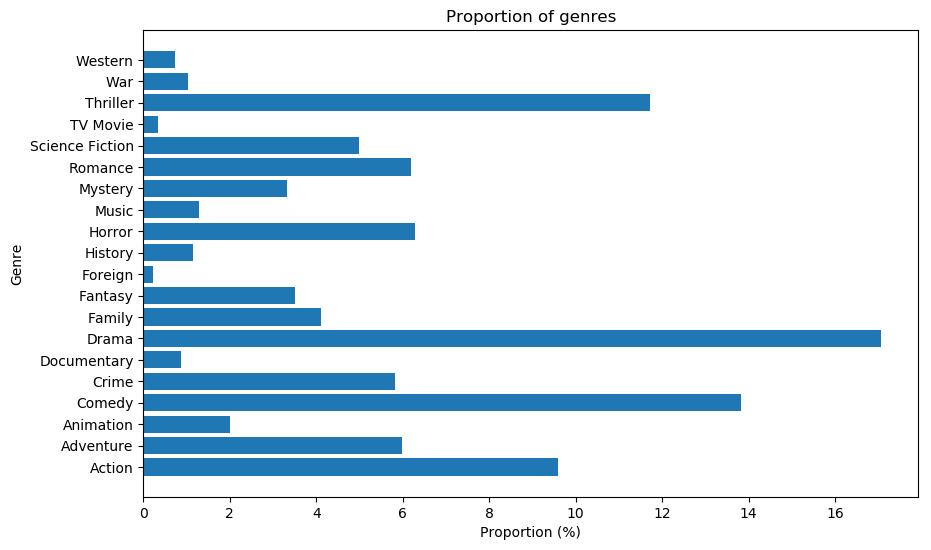

In [130]:
val_counts = dict(split_count("genres"))
val_counts_genres = [i for i in val_counts.keys()]
val_counts_count = [i for i in val_counts.values()]
total = sum(val_counts_count)
proportions = [i/total for i in val_counts_count]

data = {k:v for (k,v) in zip(val_counts_genres, proportions)}
x = [i for i in data.keys()]
y = [i*100 for i in data.values()]

# fig size
plt.figure(figsize=(10,6.18), dpi = 100)
# x-axis name
plt.xlabel('Proportion (%)')
# y-axis name 
plt.ylabel('Genre')
# plot title
plt.title('Proportion of genres')
# plot `genre` vs `proportion`
plt.barh(x, y)
plt.show;


### Findings
* the genre `Drama` accounts for the highest proportion of movies released
* the genre `Foreign` accounts for the lowest proportion of movies released
* the top 4 genres account for 48% of all movies released

<a id='conclusions'></a>
## Conclusions


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

# Conclusions

* Average `rating` changes with time
    * rating appears to rise at the beginning of every decade then falls towards the end
    * the trend shows that rating decreases with time despite the fluctuations
* Average `revenue` changes with time
    * revenue appears to rise at the beginning of every decade then falls towards the end
    * the trend shows that revenue increases with time despite the fluctuations
* `runtime` statistics and inferences
    * the average runtime is _c._ 105 minutes
    * the longest movie lasts 705 minutes
    * data for the shortest movie is affected by zero values; no movie is zero minutes long
    * the CV suggests that majority of the `runtime` observations are very close to the mean
    * mean is greater than median; this suggests a skew to the right
* insights from the `genre` variable
    * the genre `Drama` accounts for the highest proportion of movies released
    * the genre `Foreign` accounts for the lowest proportion of movies released
    * the top 4 genres account for 48% of all movies released

# Limitations

* zero values in the `runtime` variable, for example, affect statistical findings
* _c._ 30% of the observations in the original dataset were dropped


# Next steps
* learn to use `pandas`' in-built functions
* learn to use `seaborn`
* learn to formulate better questions
* learn advanced data slicing
* learn advanced visualisation using `matplotlib` and `seaborn`
* work on best practices

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])